# Telecom Churn Case Study

The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# Problem Statement

### Business problem overview

. In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

. For many incumbent operators, retaining high profitable customers is the number one business goal.

. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Definitions of churn
. There are various ways to define churn, such as:

### Revenue-based churn:
. Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

### Usage-based churn:
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

# Objective
- To Predict the customers who are about to churn from a telecom operator
- Business Objective is to predict the High Value Customers only
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage

### Requirement:

- Churn Prediction Model
- Best Predictor Variables

# Steps to Approach The  Best Solution For This Case Study
There are mainly 6 steps
#### Step 1 :
- Data reading
- Data Understanding
- Data Cleaning
- Imputing missing values 

#### Step-2 :
Need to Filter high value customers

#### Step-3 :
Derive churn
   need to Derive the Target Variable
   
#### Step-4 :
Data Preparation
  - Derived variable
  - EDA
  - Split data in to train and test sets
  - Performing Scaling
 
#### Step-5 :
- Handle class imbalance
- Dimensionality Reduction using PCA
- Classification models to predict Churn (Use various Models )

#### Step-6 :
- Model Evaluation
- Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)

Finally we need to give best Summarize to the company 

## Import  Libraries

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [282]:
#pip install imbalanced-learn

In [238]:
# read data
data= pd.read_csv("train.csv")

In [233]:
data.head().T

,0,1,2,3,4
id,0,1,2,3,4
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,31.277,0.0,60.806,156.362,240.708
arpu_7,87.009,122.787,103.176,205.26,128.191


In [34]:
data['std_og_mou_6'].isna().sum() / data['std_og_mou_6'].isna().count() * 100

3.954342204888641

In [285]:
# create backup of data
original_data = data.copy()

In [286]:
#look at the last 5 rows
data.tail() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


In [287]:
#check the columns of data
data.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [288]:
#Checking the numerical columns data distribution statistics
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [289]:
#check dataframe for null and datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [290]:
# feature type summary
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [291]:
# Checking for null values
data.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [292]:
# Checking the null value percentage
data.isna().sum()/data.isna().count()*100

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [293]:
# Checking for shape of a data set
data.shape

(69999, 172)

In [294]:
# Checking for the duplicates
data.drop_duplicates(subset=None, inplace=True)
data.shape

(69999, 172)

In [295]:
#check the size of data
data.size

12039828

In [296]:
#check the axes of data
data.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997,
             69998],
            dtype='int64', length=69999),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [297]:
#check the dimensions of data
data.ndim

2

In [298]:
#check the values of data
data.values

array([[0, 109, 0.0, ..., 0.0, 0.0, 0],
       [1, 109, 0.0, ..., 0.0, 0.0, 0],
       [2, 109, 0.0, ..., 0.0, 0.0, 0],
       ...,
       [69996, 109, 0.0, ..., 0.0, 0.0, 0],
       [69997, 109, 0.0, ..., 1402.96, 990.97, 0],
       [69998, 109, 0.0, ..., 0.0, 0.0, 0]], dtype=object)

In [299]:
#list of columns
pd.DataFrame(data.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
167,aon
168,aug_vbc_3g
169,jul_vbc_3g
170,jun_vbc_3g


In [300]:
# look at missing value ratio in each column
data.isnull().sum() * 100 / data.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [478]:
(data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).head(64)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

# Data Cleaning

- Clean or impute missing values.
- Remove duplicate records if necessary.
- Correct any data inconsistencies or errors.

In [302]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [303]:
# data is highly skewed so we will use median for missing fill na values for float and int
for feature in data.columns:
    if data[feature].dtypes != 'object':
        skewness = data[feature].skew()
        print(f"Skewness of '{feature}': {skewness}")

Skewness of 'id': 0.0
Skewness of 'circle_id': 0
Skewness of 'loc_og_t2o_mou': 0
Skewness of 'std_og_t2o_mou': 0
Skewness of 'loc_ic_t2o_mou': 0
Skewness of 'arpu_6': 13.700342827550731
Skewness of 'arpu_7': 20.271332375021498
Skewness of 'arpu_8': 19.045774106299618
Skewness of 'onnet_mou_6': 6.140530275668938
Skewness of 'onnet_mou_7': 6.593318250440481
Skewness of 'onnet_mou_8': 7.149100724253364
Skewness of 'offnet_mou_6': 4.933533409292347
Skewness of 'offnet_mou_7': 5.057605910264967
Skewness of 'offnet_mou_8': 6.18421020710315
Skewness of 'roam_ic_mou_6': 16.844320569249692
Skewness of 'roam_ic_mou_7': 27.37308248050083
Skewness of 'roam_ic_mou_8': 25.776788404336997
Skewness of 'roam_og_mou_6': 14.083542921789734
Skewness of 'roam_og_mou_7': 14.273037874007164
Skewness of 'roam_og_mou_8': 23.746728104370458
Skewness of 'loc_og_t2t_mou_6': 13.933248096467356
Skewness of 'loc_og_t2t_mou_7': 15.390717559782741
Skewness of 'loc_og_t2t_mou_8': 19.932183892858017
Skewness of 'loc_og_

#### Handle Outliers

In [409]:
def col_clip(col):
    mean = col.mean()
    std = col.std()
    return col.clip(mean - 2 * std, mean + 2 * std)


In [410]:
def handle_outliers (data):
    df_numerical_variables = data.select_dtypes(include=['int64', 'float64'])
    df_numerical_variables.info()
    # Apply the capping to the numerical columns
    # Let us cap the values
    df_numerical_variables = df_numerical_variables.apply(col_clip, axis=0)
    data[df_numerical_variables.columns] = df_numerical_variables;
    return data

In [411]:
from datetime import datetime

def calculate_latest_charge_date(date_6, date_7, date_8):
    # Function to check if a date string is valid
    def is_valid_date(date_str):
        try:
            datetime.strptime(date_str, '%m/%d/%Y')
            return True
        except ValueError:
            return False

    # Check conditions and calculate months_since_last_charge
    if date_8 and not pd.isna(date_8) and is_valid_date(date_8):
        months_since_last_charge = 0
    elif date_7 and not pd.isna(date_7) and is_valid_date(date_7):
        months_since_last_charge = 1
    elif date_6 and not pd.isna(date_6) and is_valid_date(date_6):
        months_since_last_charge = 2
    else:
        months_since_last_charge = 3
    return months_since_last_charge



# Function to calculate months_since_last_charge
def calculate_months_since_last_charge_df(row):
    return calculate_latest_charge_date(row['date_of_last_rech_6'], row['date_of_last_rech_7'], row['date_of_last_rech_8'])


In [412]:
def prepare_data (data):

    # Keep only those columns that have lt or eq 40% missing values
    data_filtered = data.loc[:, data.isnull().mean() <= 0.4]
    
    # Compute the months_since_last_recharge column and drop the corresponding date fields
    last_recharge_fields = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
    last_recharge_df = data_filtered[last_recharge_fields]
    data_filtered['months_since_last_charge'] = last_recharge_df.apply(calculate_months_since_last_charge_df, axis=1)
    data_filtered.drop(last_recharge_fields, axis=1, inplace=True)


    numerical_cols = data_filtered.select_dtypes(include='number').columns
    categorical_cols = data_filtered.select_dtypes(include='object').columns

    # Initialize SimpleImputer - median for numeric, mode for categorical
    median_imputer = SimpleImputer(strategy='median')
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data_filtered[numerical_cols] = median_imputer.fit_transform(data_filtered[numerical_cols])
    # Do we really need to impute here?  We are dropping it below anyway
    data_filtered[categorical_cols] = mode_imputer.fit_transform(data_filtered[categorical_cols])
    
    # remove duplicates if any
    data_filtered.drop_duplicates()

    # Drop fields with unique values
    data_filtered = data_filtered.loc[:, data_filtered.nunique() > 1]
    
    return data_filtered

In [470]:
# read data
data = pd.read_csv("train.csv")

In [471]:
# Handle Outliers
# Remove id & churn_probability fields
data_without_outliers = handle_outliers(data.drop(['id','churn_probability'], axis=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 161 entries, circle_id to jun_vbc_3g
dtypes: float64(135), int64(26)
memory usage: 86.0 MB


In [472]:
data[data_without_outliers.columns] = data_without_outliers

<Axes: >

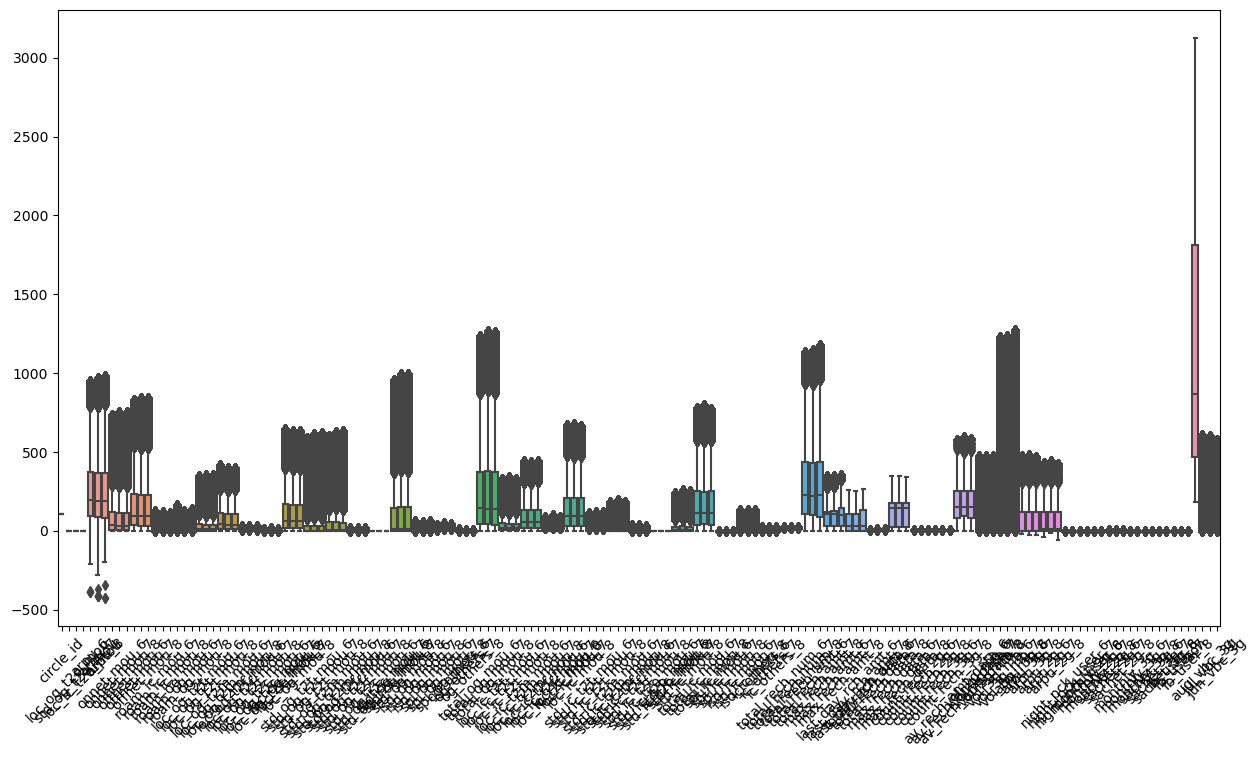

In [473]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data.select_dtypes(include=['int64', 'float64']).drop(['id', 'churn_probability'], axis=1))

In [474]:
filtered_df = prepare_data(data)

In [475]:
filtered_df.shape

(69999, 127)

In [419]:
def display_data(train):
    print("Shape",train.shape)
    pd.set_option('display.max_rows', 200)
    missing_info=pd.concat([train.dtypes, train.nunique(), train.isnull().sum() / len(train) * 100 ], axis=1)
    missing_info.columns=['Data_Types', 'nunique','Missing_Values']
    print("_"*100)
    
    print(missing_info)

In [384]:
filtered_df.head(n=2).T

,0,1
id,0.0,1.0
arpu_6,31.277,0.0
arpu_7,87.009,122.787
arpu_8,7.527,42.953
onnet_mou_6,48.58,0.0
onnet_mou_7,124.38,0.0
onnet_mou_8,1.29,0.0
offnet_mou_6,32.24,0.0
offnet_mou_7,96.68,25.99
offnet_mou_8,2.33,30.89


In [ ]:
# [Action]

# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [ ]:
# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
data[zero_impute].isnull().sum()*100/data.shape[1]

In [ ]:
# now we can check the "statistics Summary"
data[zero_impute].describe(include='all')

In [ ]:
# [Analysis]
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == data.shape[1])

In [ ]:
# [Action]
# drop id and date columns
data = data.drop(id_cols + date_cols, axis=1)
#check the shape again
data.shape

In [ ]:
# replace missing values with '-1' in categorical columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [ ]:
# missing value ratio
data[cat_cols].isnull().sum()*100/data.shape[0]

Droping variables with more than 70% of missing values (we can call it as threshold )

In [ ]:
(data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).head(15)

In [ ]:
# [Action]
initial_cols = data.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':data.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

In [ ]:
# [Action]
# now we can drop  some more columns
data = data.loc[:, include_cols]

dropped_cols = data.shape[1] - initial_cols
dropped_cols

In [ ]:
#rechecking the shape of a dataframe
data.shape

In [ ]:
# rechecking the missing values for how many missing values has left
data.isnull().sum()*100/data.shape[0]

In [ ]:
# [Action]
num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]
num_cols

In [ ]:
#imputing with meadian for num_cols
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median()))

In [ ]:
#again checking for the missing values
data.isnull().sum()*100/data.shape[0]

In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good & action’ phase [Month 6 & 7]
- The ‘churn’ phase [Month 8]
In this case, since we are working over a three-month window, the first two months are the ‘good & action’ phase, the third month is the ‘churn’ phase.

Here we can take good phase ( it means month 6 and 7) data to get high value customers

In [ ]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [ ]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [ ]:
# calculate average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [ ]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.7)))


In [ ]:
data.head()

In [ ]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
data_filtered = data.loc[data.av_amt_data_6_7 >= data.av_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)


In [ ]:
data_filtered.shape

In [ ]:
# delete variables created to filter high-value customers
data_filtered = data_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)


In [ ]:
data_filtered.shape

 hear we're left with 21,013 rows  and 149 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [ ]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
data_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
data_filtered[data_col].info()

In [ ]:
# lets find out churn/non churn percentage
print((data_filtered['churn_probability'].value_counts()/len(data))*100)
((data_filtered['churn_probability'].value_counts()/len(data))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 90% of the customers do not churn, there is a possibility of class imbalance*** 
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.


We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [ ]:
#data['total_rech_amt_data_6']=data['av_rech_amt_data_6'] * data['total_rech_data_6']
# data['total_rech_amt_data_7']=data['av_rech_amt_data_7'] * data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7 and 8

# data['overall_rech_amt_6'] = data['total_rech_amt_data_6'] + data['total_rech_amt_6']
# data['overall_rech_amt_7'] = data['total_rech_amt_data_7'] + data['total_rech_amt_7']

# [Action]
data_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [ ]:
# creating a list of column names for each month
mon_6_cols = [col for col in data_filtered.columns if '_6' in col]
mon_7_cols = [col for col in data_filtered.columns if '_7' in col]
mon_8_cols = [col for col in data_filtered.columns if '_8' in col]

In [ ]:
mon_7_cols

In [ ]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
data_corr = data_filtered.corr()
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr = data_corr.stack()
data_corr
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

In [ ]:
# [Action]
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
data_filtered.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
# The curent dimension of the dataset after dropping few unwanted columns
data_filtered.shape

# Step 4:
# Data preparation

# 1. EDA

In [ ]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
# [Action]
data_filtered['tenure'] = (data_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
data_filtered.drop('aon',axis=1, inplace=True)

In [ ]:
# Checking the distribution of he tenure variable

sns.distplot(data_filtered['tenure'],bins=30)
plt.show()

In [ ]:
# [Action]
# [HB] tenure_range is created and then dropped later.  Then do really need it?
# [HB] Is it just for analysis
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_filtered['tenure_range'] = pd.cut(data_filtered['tenure'], tn_range, labels=tn_label)
data_filtered['tenure_range'].head()

In [ ]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=data_filtered )
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [ ]:
# [Action]
data_filtered["avg_arpu_6_7"]= (data_filtered['arpu_6']+data_filtered['arpu_7'])/2
data_filtered['avg_arpu_6_7'].head()

In [ ]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

data_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
data_filtered.shape

In [ ]:
# Visualizing the column created
sns.distplot(data_filtered['avg_arpu_6_7'])
plt.show()

In [ ]:
# Checking Correlation between target variable(Churn Probability) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(data_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [ ]:
data_filtered.columns

- Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
- Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

In [ ]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
data_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [ ]:
# [Action] ???
# Creating categories for month 8 column totalrecharge and their count
data_filtered['total_rech_data_group_8']=pd.cut(data_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
data_filtered['total_rech_num_group_8']=pd.cut(data_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

In [ ]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=data_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",data_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=data_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",data_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [ ]:
# [Action]
# So many feilds are dropped
data_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [ ]:
# [Action]
# So many feilds are dropped
data_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [ ]:
data_filtered.shape

In [ ]:
plt.figure(figsize = (50, 50))
sns.heatmap(data_filtered.corr())
plt.show()

In [ ]:
data_filtered.info()

In [ ]:
# [Action]
data_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [ ]:
data_filtered.shape

In [ ]:
data_filtered.info()

In [ ]:
# [Action]
data_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [255]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 132 entries, id to rech_day_8
dtypes: datetime64[ns](3), float64(99), int32(3), int64(27)
memory usage: 69.7 MB


In [ ]:
# [Analysis]
data_rate = (sum(data_filtered["churn_probability"])/len(data_filtered["churn_probability"].index))*100
data_rate

# 2. Split Data Into Train and Test Data

In [ ]:
data_filtered.shape

In [ ]:
# divide data into train and test
X = data_filtered.drop("churn_probability", axis = 1)
y = data_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [ ]:
# print shapes of train and test sets
X_train.shape

In [ ]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection


## Data Imbalance Handling
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import numpy as np
print(np.isnan(X_train).any())  # Check for NaN values in X_train


In [ ]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

# Logistic Regression

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

# Logistic Regression using Feature Selection (RFE method)


In [ ]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [ ]:
rfe.support_

In [ ]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

In [ ]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

# Assessing the model with StatsModels

In [ ]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [ ]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

# Confusion matrix

# Predicted     not_churn    churn
# Actual

# not_churn     11630           2825
                    
# churn             2238            12217  

In [ ]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

# Check for the VIF values of the feature variables


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Metrics beyond simply accuracy


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

#### Plotting the ROC Curve

In [ ]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [ ]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [ ]:
#### From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

In [ ]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

In [ ]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

#### Precision and recall tradeoff


In [ ]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set
**Transforming and feature selection for test data**

In [ ]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

In [ ]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

In [ ]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable

In [ ]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])

In [ ]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

In [ ]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

In [ ]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

**Metrics Evaluation**

In [ ]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

In [ ]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

### Explaining the results

In [ ]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

In [ ]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

## The AUC score for train dataset is 0.90 and the test dataset is 0.88.
# This model can be considered as a good model.**

# PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [ ]:
X_train.shape

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.components_

### Analysing the explained variance ratio

In [ ]:
pca.explained_variance_ratio_

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [ ]:
pca_final = IncrementalPCA(n_components=16)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

#### Create LGBM Classifer with PCA Data

In [ ]:
def evaluate_model_with_data(classifier, X, y):
    print("Train Accuracy :", accuracy_score(y, classifier.predict(X)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y, classifier.predict(X)))

In [ ]:
# Hyper-parameters
param = {
    'num_leaves': 150,
    'max_depth':7,
    'learning_rate':.05,
    'max_bin':200,
    'metric': ['auc', 'binary_logloss'],
    'boosting_type': 'gbdt'
}

In [ ]:
# LightGBM Learning Algo
import lightgbm as gbm
lgb_classifier_after_pca = gbm.LGBMClassifier(random_state=42, **param)

In [ ]:
lgb_classifier_after_pca.fit(df_train_pca, y_train)

In [ ]:
evaluate_model_with_data(lgb_classifier_after_pca, df_train_pca, y_train)

In [ ]:
evaluate_model_with_data(lgb_classifier_after_pca, df_test_pca, y_test)

## Applying logistic regression on the Principal components

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set


In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

### Confusion matrix, Sensitivity and Specificity


In [ ]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

## Making predictions on the train set

In [ ]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

### Confusion matrix, Sensitivity and Specificity


In [ ]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

## Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [ ]:
dt_best.fit(df_train_pca, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [ ]:
evaluate_model(dt_best)

##  Random Forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [ ]:
rf.fit(df_train_pca, y_train)

In [ ]:
rf.oob_score_

In [ ]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
#plot_roc_curve(rf, df_train_pca, y_train)
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

In [ ]:
grid_search.best_score_ 

In [ ]:
grid_search.best_params_

In [ ]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [ ]:
rfc_model.fit(df_train_pca, y_train)

In [ ]:
evaluate_model(rfc_model)

In [ ]:
rfc_model.feature_importances_

## Note:

Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.


The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:

 After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~90%
. Test Accuracy : ~88%

#### Logistic regression with PCA

. Train Accuracy : ~92%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~94%
. Test Accuracy : ~93%


#### Random Forest with PCA:
. Train Accuracy :~ 92%
. Test Accuracy :~ 92%

# v.Split Data Into Train and Test Data

In [420]:
# divide data into train and test
filtered_df.drop('id', axis=1, inplace=True)
X = filtered_df.drop("churn_probability", axis = 1)
y = filtered_df.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [421]:
print(filtered_df.shape)
print(X.shape)
print(y.shape)

(69999, 126)
(69999, 125)
(69999,)


# vi.Perform Scaling

In [422]:
# Standard Scaler
#Logistic Regression
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('LR', LogisticRegression(random_state=1))])
# descion tree
pipe_dt =Pipeline([('scl', StandardScaler()),
                   ('DT', DecisionTreeClassifier(random_state=1))])
# Random Forest
pipe_rf = Pipeline ([
    ('pca', IncrementalPCA(n_components=16)),
    ('scl', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=1))
])
# K Nearest Neighbour
pipe_knn =Pipeline([('scl', StandardScaler()),
                   ('KNN', KNeighborsClassifier())])
# XGB
pipe_xgb =Pipeline([('scl', StandardScaler()),
                   ('XGB', XGBClassifier(random_state=1))])

# FIT Model 

## Logistic Regression

In [423]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])

In [424]:
# print("Logistic Regression Model")
# print(lr_grid_search.score(x_test, y_test)*100)
# print("+"*100)
# print(lr_grid_search.score(x_train, y_train)*100)
# print(lr_grid_search.best_params_)

print("Logistic Regression Model")
print("Train=>",pipe_lr.score(X_train, y_train)*100)
print("Test=>",pipe_lr.score(X_test, y_test)*100)
print("+"*100)
print(pipe_lr)


Logistic Regression Model
Train=> 93.15986971180403
Test=> 93.02285714285713
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])


<Axes: ylabel='Feature'>

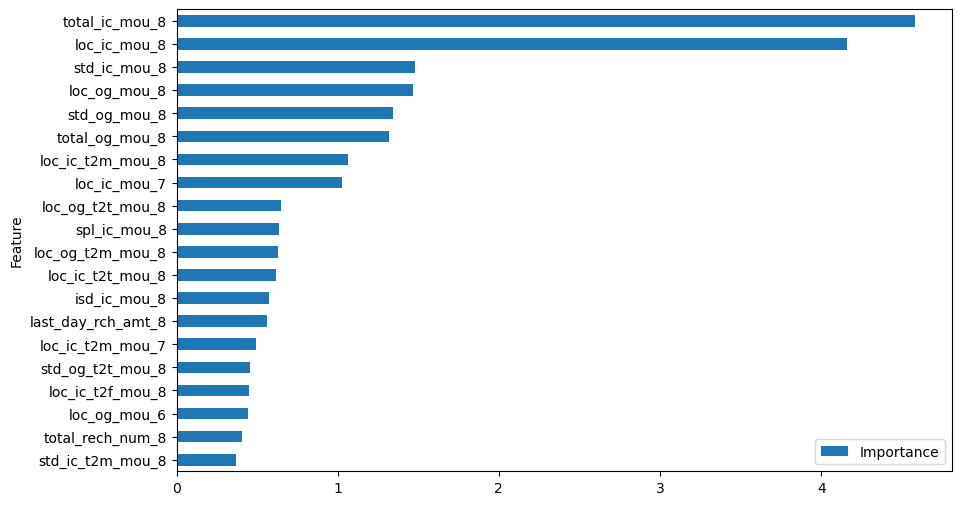

In [486]:

coefficients = pipe_lr['LR'].coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True).tail(20)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


# Decision Tree

In [315]:
#dt_grid_search.fit(x_train, y_train)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('DT', DecisionTreeClassifier(random_state=1))])

In [316]:
# print("Decision Trees Model")
# print(dt_grid_search.score(x_test, y_test)*100)
# print("+"*100)
# print(dt_grid_search.best_params_)
# print(dt_grid_search.score(x_train, y_train)*100)

print("Decision Trees Model")
print("Train",pipe_dt.score(X_train, y_train)*100)
print("Test",pipe_dt.score(X_test, y_test)*100)
print("+"*150)


Decision Trees Model
Train 100.0
Test 90.90857142857143
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Random Forest

In [388]:
pipe_rf.fit(X_train, y_train)

ValueError: could not convert string to float: '6/30/2014'

In [325]:
print("Random forest Model")
print("Train",pipe_rf.score(X_train, y_train)*100)
print("Test",pipe_rf.score(X_test, y_test)*100)
print("+"*100)
y_train_pred = pipe_rf.predict(X_train)
print(classification_report(y_train, y_train_pred))
print("+"*100)

y_test_pred = pipe_rf.predict(X_test)
print(classification_report(y_test, y_test_pred))



Random forest Model
Train 100.0
Test 91.52571428571429
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47150
         1.0       1.00      1.00      1.00      5349

    accuracy                           1.00     52499
   macro avg       1.00      1.00      1.00     52499
weighted avg       1.00      1.00      1.00     52499

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     15717
         1.0       0.71      0.28      0.40      1783

    accuracy                           0.92     17500
   macro avg       0.82      0.63      0.68     17500
weighted avg       0.90      0.92      0.90     17500



# K-nearest Neighbour

In [319]:
pipe_knn.fit(X_train, y_train)

print("K nearest Neighbour Model")
print("Train",pipe_knn.score(X_train, y_train)*100)
print("Test",pipe_knn.score(X_test, y_test)*100)
print("+"*100)

K nearest Neighbour Model
Train 93.11415455532487
Test 90.88571428571429
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# XGB 

In [318]:
pipe_xgb.fit(X_train, y_train)

print("XGB Model")
print("Train",pipe_xgb.score(X_train, y_train)*100)
print("Test",pipe_xgb.score(X_test, y_test)*100)
print("+"*100)

XGB Model
Train 98.2094897045658
Test 94.01714285714286
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# TEST DATA

In [326]:
data_unseen=pd.read_csv("test.csv")

In [327]:
data_unseen=prepare_data(data_unseen)

In [328]:
data_unseen.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,months_since_last_charge
0,69999.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,...,0.0,0.0,0.0,0.0,0.0,1692.0,0.00,0.00,0.00,0.0
1,70000.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,...,0.0,0.0,0.0,0.0,0.0,2533.0,0.00,0.00,0.00,0.0
2,70001.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,...,0.0,0.0,0.0,0.0,0.0,277.0,525.61,758.41,241.84,0.0
3,70002.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.00,0.00,0.00,0.0
4,70003.0,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,...,0.0,0.0,0.0,0.0,0.0,462.0,0.00,0.00,0.00,0.0


In [329]:
data_unseen['churn_probability'] = pipe_rf.predict(data_unseen.drop(['id'], axis =1 ))

In [330]:
data_unseen['churn_probability'].value_counts()

churn_probability
0.0    28694
1.0     1306
Name: count, dtype: int64

In [331]:
final_prediction = data_unseen[['id','churn_probability']]

In [332]:
final_prediction['churn_probability'] = final_prediction.churn_probability.apply(np.int64)
final_prediction['id'] = final_prediction.id.apply(np.int64)

In [333]:
final_prediction.to_csv('submission.csv',index=False)
final_prediction.head

<bound method NDFrame.head of           id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]>